In [403]:
#importing the basic libraries
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

In [404]:
#read the CSV file
#sales = pd.read_excel(r'C:\Users\HR\Documents\ML-Labs\Sales.Dirty.xlsx')

sales = pd.read_excel("Sales.Dirty.xls")
sales = sales.drop(['Province','Region','Customer Segment','Product Container','Ship Mode'],axis=1)

In [405]:
sales.head(4)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Profit,Unit Price,Shipping Cost,Customer Name,Product Category,Product Sub-Category,Product Name,Ship Date
0,1,3.0,Male,Low,6,261.54,0.04,-213.2500,38.94,35.00,25000,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",NaN
1,49,293.0,2012-10-01 00:00:00,High,49,10123,0.07,457.8100,208.16,68.02,Barry French,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",2012-10-02 00:00:00
2,50,293.0,2012-10-01 00:00:00,High,27,244.57,0.01,46.7075,8.69,2.99,Barry French,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",2012-10-03 00:00:00
3,80,483.0,2011-07-10 00:00:00,High,30,4965.76,0.08,1198.9710,195.99,3.99,Clay Rozendal,Technology,Telephones and Communication,R380,2011-07-12 00:00:00


In [406]:
sales.dtypes

Row ID                    int64
Order ID                float64
Order Date               object
Order Priority           object
Order Quantity           object
Sales                    object
Discount                float64
Profit                  float64
Unit Price              float64
Shipping Cost           float64
Customer Name            object
Product Category         object
Product Sub-Category     object
Product Name             object
Ship Date                object
dtype: object

In [407]:
#sales
sales.isnull().sum()

Row ID                    0
Order ID                545
Order Date                9
Order Priority           12
Order Quantity            0
Sales                    19
Discount                  0
Profit                    0
Unit Price                0
Shipping Cost             0
Customer Name             0
Product Category         31
Product Sub-Category      0
Product Name             13
Ship Date                12
dtype: int64

In [408]:
sales = sales.rename(columns = {"Order ID": "order_id",
                         "Order Date":"order_date",
                         "Order Priority": "order_priorty",
                         "Order Quantity": "order_quantity",
                         "Customer Name": "c_name",
                         "Shipping Cost": "ship_cost",
                         "Unit Price": "unit_price",
                         "Product Category": "prod_cat",
                         "Product Sub-Category": "prod_sub_cat",
                         "Ship Date": "ship_date",
                         "Product Name": "prod_name"}) 

#initially finding all incorrect values by typecasting, typecasting errors helped in quickly identifing incorrect values, although 
#value_count was lso used but in some cases it didn't help, the following is carried with value count to find incorrect values in extracted columns


In [409]:
sales.order_priorty.value_counts()

High             1765
Low              1718
Not Specified    1672
Medium           1627
Critical         1605
Name: order_priorty, dtype: int64

In [410]:
sales.order_quantity.value_counts()

31          202
4           196
39          195
46          193
24          192
23          191
42          189
3           189
43          184
50          182
41          182
29          180
8           176
20          175
7           174
26          174
6           172
48          172
16          171
32          170
36          169
10          169
25          167
15          166
47          166
5           166
1           165
34          164
12          164
30          163
19          163
45          163
27          162
33          161
21          158
14          158
44          157
38          156
37          155
18          155
9           155
2           152
11          151
35          151
17          151
13          150
40          150
28          148
22          145
49          136
Old           1
Teenager      1
Male          1
Female        1
Name: order_quantity, dtype: int64

In [411]:
sales.Discount.value_counts()

0.01    806
0.05    786
0.03    779
0.09    778
0.04    770
0.08    765
0.02    765
0.00    756
0.10    745
0.06    734
0.07    710
0.17      1
0.16      1
0.21      1
0.11      1
0.25      1
Name: Discount, dtype: int64

In [412]:
sales.Profit.value_counts()

-969.048366     8
-433.290143     6
-1331.553366    5
-505.984479     5
-715.778206     5
               ..
-18.190000      1
-145.716500     1
 145.480000     1
-1916.710000    1
-12.250000      1
Name: Profit, Length: 7986, dtype: int64

In [413]:
sales.unit_price.value_counts()

6.48      264
65.99     192
4.98      136
125.99    115
5.98      102
         ... 
19.90       1
299.05      1
10.13       1
2.67        1
5.16        1
Name: unit_price, Length: 751, dtype: int64

In [414]:
sales.ship_cost.value_counts()

19.99    352
8.99     321
1.99     247
0.50     190
0.99     144
        ... 
57.87      1
3.44       1
4.19       1
54.95      1
1.05       1
Name: ship_cost, Length: 652, dtype: int64

In [415]:
sales.c_name.value_counts()

Darren Budd          41
Ed Braxton           38
Brad Thomas          35
Carlos Soltero       33
Patrick Jones        30
                     ..
123456                1
Sample Company A      1
Natalie DeCherney     1
Dorothy Dickinson     1
Maureen Grace         1
Name: c_name, Length: 801, dtype: int64

In [416]:
sales.prod_sub_cat.value_counts()

Paper                             1225
Binders and Binder Accessories     915
Telephones and Communication       883
Office Furnishings                 788
Computer Peripherals               758
Pens & Art Supplies                633
Storage & Organization             546
Appliances                         434
Chairs & Chairmats                 386
Tables                             361
Office Machines                    337
Labels                             288
Envelopes                          246
Bookcases                          189
Rubber Bands                       179
Scissors, Rulers and Trimmers      144
Copiers and Fax                     87
Name: prod_sub_cat, dtype: int64

In [417]:
sales.prod_cat.value_counts()

Office Supplies    4592
Technology         2059
Furniture          1717
Name: prod_cat, dtype: int64

In [418]:
sales.prod_name.value_counts()
#sales['product_name'] = sales['product_name'].astype(str)

Global High-Back Leather Tilter, Burgundy                            24
Fiskars® Softgrip Scissors                                           22
Master Giant Foot® Doorstop, Safety Yellow                           22
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables    22
Bevis 36 x 72 Conference Tables                                      22
                                                                     ..
Wilson Jones Standard D-Ring Binders                                  1
APC 7 Outlet Network SurgeArrest Surge Protector                      1
O'Sullivan 4-Shelf Bookcase in Odessa Pine                            1
Xerox 1883                                                            1
IBM 3.5" DS/HD IBM Formatted Diskettes, 50/Pack                       1
Name: prod_name, Length: 1263, dtype: int64

In [419]:
sales['Sales'].value_counts()

Bad        9
115.81     3
10.48      3
43.29      3
19.36      3
          ..
999.89     1
91.15      1
181.95     1
2860.93    1
2039.39    1
Name: Sales, Length: 8129, dtype: int64

In [420]:
#replacing incorrect values with mode, however where there were more than 1 modes were averaged(in case of numbers)
sales['c_name'] = sales['c_name'].replace(to_replace='25', value='Darren Budd')
sales['c_name'] = sales['c_name'].replace(to_replace='123456', value='Darren Budd')
sales['c_name'] = sales['c_name'].replace(to_replace='25000', value='Darren Budd')

In [421]:
sales['order_quantity'] = sales['order_quantity'].replace(to_replace='Teenager', value='31')
sales['order_quantity'] = sales['order_quantity'].replace(to_replace='Female', value='31')
sales['order_quantity'] = sales['order_quantity'].replace(to_replace='Old', value='31')
sales['order_quantity'] = sales['order_quantity'].replace(to_replace='Male', value='31')


In [422]:
#replacing incorrect values of sale with nan
sales['Sales'] = sales['Sales'].replace(to_replace='Bad', value = np.nan)
sales['Sales'] = sales['Sales'].replace(to_replace='High', value = np.nan)
sales['Sales'] = sales['Sales'].replace(to_replace='Low', value = np.nan)
sales['Sales'] = sales['Sales'].replace(to_replace='Error here', value = np.nan)
sales['Sales'] = sales['Sales'].replace(to_replace='James Leeland',value = np.nan)
#sales['Sales'].fillna('0',inplace=True)

In [423]:
#After catering all incorrect values, doing typecasting
sales['order_priorty'] = sales['order_priorty'].astype(str) 
sales['order_quantity'] = sales['order_quantity'].astype(float) 
sales['Discount'] = sales['Discount'].astype(float) 
sales['Profit'] = sales['Profit'].astype(float) 
sales['unit_price'] = sales['unit_price'].astype(float) 
sales['ship_cost'] = sales['ship_cost'].astype(float) 
sales['c_name'] = sales['c_name'].astype(str)
sales['prod_cat'] = sales['prod_cat'].astype(str)
sales['prod_sub_cat'] = sales['prod_sub_cat'].astype(str)
sales['prod_name'] = sales['prod_name'].astype(str)
sales['Sales'] = sales['Sales'].astype(float) 


In [424]:
sales['Sales'].isnull().sum()
sales['Sales'].value_counts()

43.29     3
20.19     3
224.58    3
127.56    3
74.02     3
         ..
64.23     1
450.28    1
604.38    1
347.47    1
256.00    1
Name: Sales, Length: 8124, dtype: int64

In [425]:
sales.isnull().sum()

Row ID              0
order_id          545
order_date          9
order_priorty       0
order_quantity      0
Sales              32
Discount            0
Profit              0
unit_price          0
ship_cost           0
c_name              0
prod_cat            0
prod_sub_cat        0
prod_name           0
ship_date          12
dtype: int64

In [426]:
sales.order_date.value_counts()
sales.order_date.mode()

0   2011-09-15
1   2012-03-28
dtype: datetime64[ns]

In [427]:
sales.ship_date.value_counts()
sales.ship_date.mode()

0   2011-05-21
dtype: datetime64[ns]

In [428]:
#sales.head(10)

In [429]:
#replacing missing order date with mode of ship date because mode of order date is less than ship date and order date cannot less or earlier than ship date than ship date
sales['order_date'] = sales['order_date'].replace(to_replace='Male', value='2011-05-21 00:00:00')
sales['order_date'] = sales['order_date'].replace(to_replace='Female', value='2011-05-21 00:00:00')
sales['order_date'].fillna("2011-05-21 00:00:00", inplace=True)
sales['ship_date'].fillna("2011-05-21 00:00:00", inplace=True)

In [430]:
sales.head(5)

,Row ID,order_id,order_date,order_priorty,order_quantity,Sales,Discount,Profit,unit_price,ship_cost,c_name,prod_cat,prod_sub_cat,prod_name,ship_date
0,1,3.0,2011-05-21 00:00:00,Low,6.0,261.5400,0.04,-213.2500,38.94,35.00,25000,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",2011-05-21 00:00:00
1,49,293.0,2012-10-01 00:00:00,High,49.0,10123.0200,0.07,457.8100,208.16,68.02,Barry French,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",2012-10-02 00:00:00
2,50,293.0,2012-10-01 00:00:00,High,27.0,244.5700,0.01,46.7075,8.69,2.99,Barry French,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",2012-10-03 00:00:00
3,80,483.0,2011-07-10 00:00:00,High,30.0,4965.7595,0.08,1198.9710,195.99,3.99,Clay Rozendal,Technology,Telephones and Communication,R380,2011-07-12 00:00:00
4,85,515.0,2010-08-28 00:00:00,Not Specified,19.0,394.2700,0.08,30.9400,21.78,5.94,Carlos Soltero,Office Supplies,Appliances,Holmes HEPA Air Purifier,2010-08-30 00:00:00


In [431]:
#lets typecast to datetime
sales['order_date'] = pd.to_datetime(sales['order_date'])
#sales['ship_date'] = sales['ship_date'].apply(pd.Timestamp)  

In [432]:
sales.head(3)

,Row ID,order_id,order_date,order_priorty,order_quantity,Sales,Discount,Profit,unit_price,ship_cost,c_name,prod_cat,prod_sub_cat,prod_name,ship_date
0,1,3.0,2011-05-21,Low,6.0,261.54,0.04,-213.2500,38.94,35.00,25000,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",2011-05-21 00:00:00
1,49,293.0,2012-10-01,High,49.0,10123.02,0.07,457.8100,208.16,68.02,Barry French,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",2012-10-02 00:00:00
2,50,293.0,2012-10-01,High,27.0,244.57,0.01,46.7075,8.69,2.99,Barry French,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",2012-10-03 00:00:00


In [433]:
sales.isnull().sum()

Row ID              0
order_id          545
order_date          0
order_priorty       0
order_quantity      0
Sales              32
Discount            0
Profit              0
unit_price          0
ship_cost           0
c_name              0
prod_cat            0
prod_sub_cat        0
prod_name           0
ship_date           0
dtype: int64

In [434]:
#Since order_priorty doesn't have any incorrect value therefore replacing it with 'High which is mode', similar is for product category
sales['order_priorty'].fillna('High',inplace=True)
sales['prod_cat'].fillna('Office Supplies',inplace=True)


In [435]:
IDs = ['Office Supplies']
temp=sales[sales['prod_cat'].isin(IDs)]

In [436]:
temp.prod_name.value_counts()

Fiskars® Softgrip Scissors                                 22
Wilson Jones Hanging View Binder, White, 1"                21
Computer Printout Paper with Letter-Trim Perforations      19
Peel & Seel® Recycled Catalog Envelopes, Brown             19
Hoover Portapower™ Portable Vacuum                         18
                                                           ..
Xerox 1941                                                  1
Sanford Colorific® Eraseable Coloring Pencils, 12 Count     1
UniKeep™ View Case Binders                                  1
Xerox 1883                                                  1
APC 7 Outlet Network SurgeArrest Surge Protector            1
Name: prod_name, Length: 716, dtype: int64

In [437]:
#replacing missing product name according to product category, by finding product name which was mostly sold according to 'office supplies' was is the mode of product category
sales['prod_name'].fillna('Fiskars® Softgrip Scissors',inplace=True)

In [438]:
sales.isnull().sum()

Row ID              0
order_id          545
order_date          0
order_priorty       0
order_quantity      0
Sales              32
Discount            0
Profit              0
unit_price          0
ship_cost           0
c_name              0
prod_cat            0
prod_sub_cat        0
prod_name           0
ship_date           0
dtype: int64

In [439]:
#The order_id column contains 6.4% missing value, therefore removing the rows which have order id missing.
sales=sales.dropna(axis=0,subset=['order_id'])

#sales

In [440]:
#we need to check how much % missing values are there (?)
print(sales.shape)

sales['Sales'].value_counts()
sales['Sales'].mode().mean()
#so replacing missing values in sales with the mean of mode(since the mode values are more than 1) of sales
sales['Sales'].fillna('67.5',inplace=True)
sales['Sales'] = sales['Sales'].astype(float)
sales['Sales'].value_counts()


#till here the questions from 1 to 4 are catered

(7854, 15)


67.5000      31
74.0200       3
46.9400       3
10.4800       3
151.1900      3
             ..
61.4300       1
33.9600       1
4010.9375     1
1458.8300     1
256.0000      1
Name: Sales, Length: 7610, dtype: int64

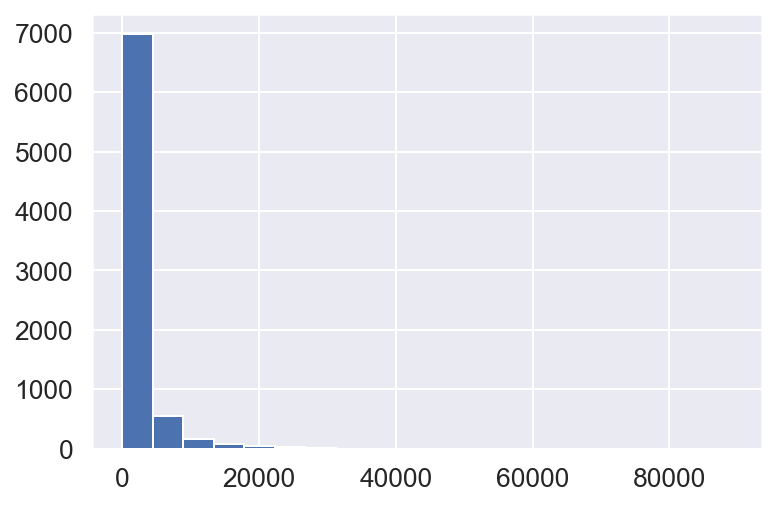

In [441]:
#Question 5 begins here...
#sales are right skewed therefore the mode is the highest point of the histogram, median and mean fall to the right of it (or, visually, the right of the peak).
sales['Sales'].hist(bins=20)

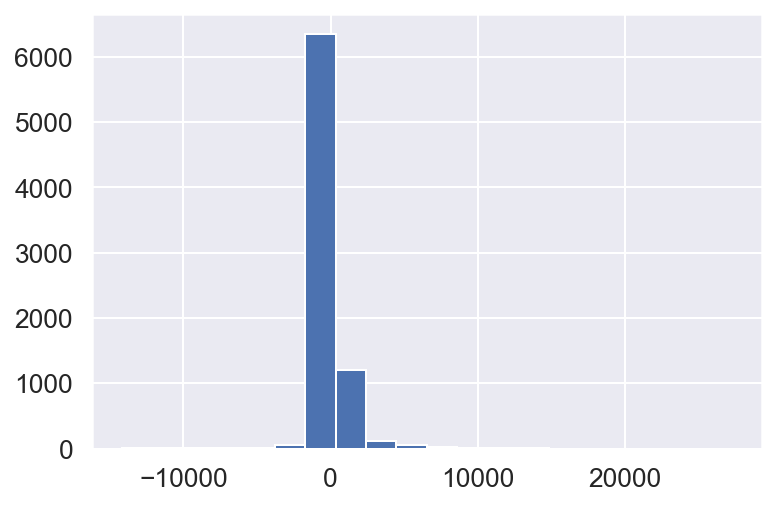

In [442]:
#the profit seems to be normally distributed, the mean (average), median, and mode are all equal. 
sales['Profit'].hist(bins=20)

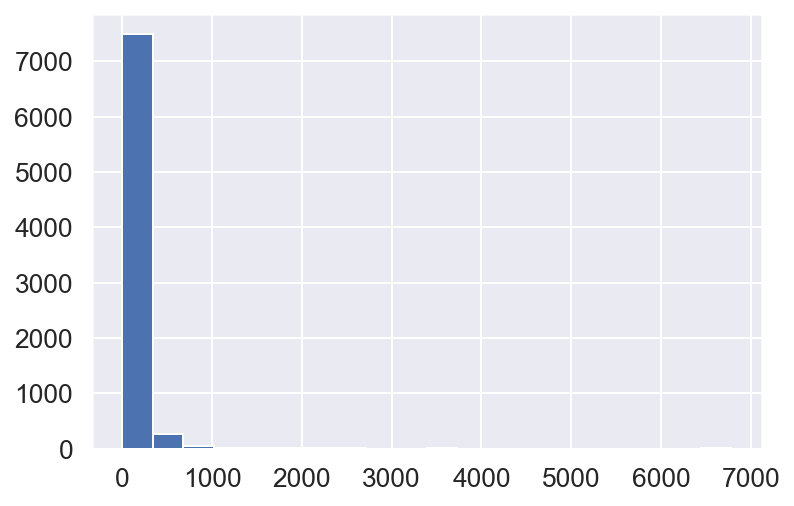

In [443]:
 #the unit price is also right skewed
sales['unit_price'].hist(bins=20)

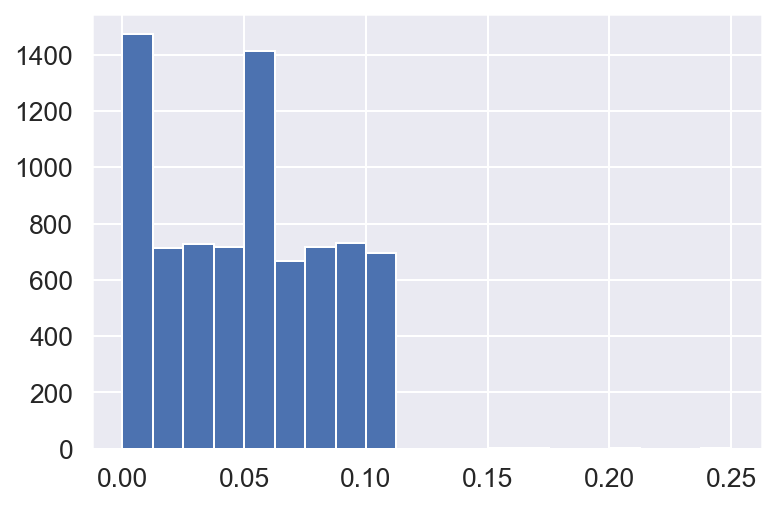

In [444]:
sales['Discount'].hist(bins=20)

In [445]:
#Extracting different components and put them in different columns (eg for data warehousing)

Sales_T_Test=sales
Sales_T_Test['Year'] = Sales_T_Test['order_date'].apply(lambda x: x.year)
Sales_T_Test['Month'] = Sales_T_Test['order_date'].apply(lambda x: x.month)
Sales_T_Test['Day'] = Sales_T_Test['order_date'].apply(lambda x: x.day)

# For T-test, the hypothesis is there is a correlation between sales and profit

c:\users\hr\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


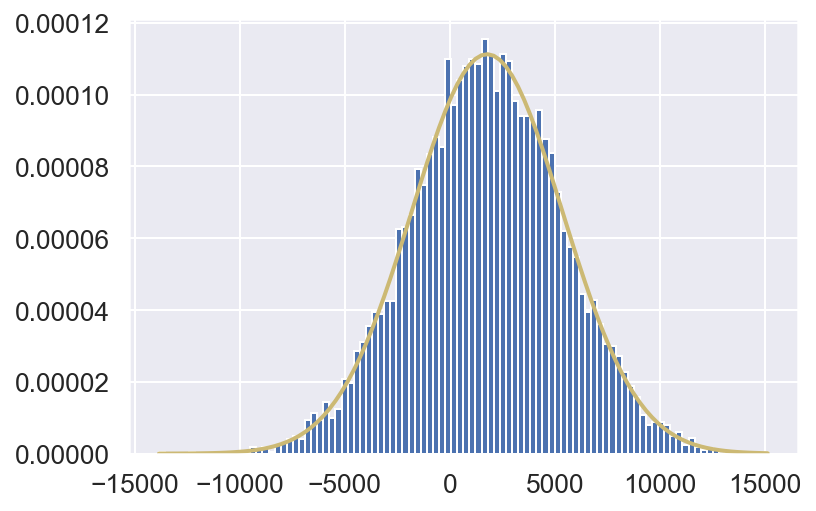

In [446]:
import math

Sales_T_Test = Sales_T_Test.drop(['order_id','order_date','order_priorty','c_name','prod_cat','prod_name','prod_sub_cat'],axis=1)
Sales_T_Test.head(1)
Sales_T_Test.dtypes
sample1=Sales_T_Test['Sales']
sample2=Sales_T_Test['Profit']
#Sales_2011=Sales_T_Test[Sales_T_Test['Year']==2011]
#Sales_2011=Sales_2011['Sales']
#Sales_2012=Sales_T_Test[Sales_T_Test['Year']==2012]
#Sales_2012=Sales_2012['Sales']
sd1 = math.sqrt(sample1.var())
sd2 = math.sqrt(sample2.var())

#Sales_2011.hist()
class norm1:
    #constructor (mean, sd, density measure)
    def __init__(self, a1, b1, c1):
        self.a1 = a1
        self.b1 = b1
        self.c1 = c1
    
    #normal curve plotting function
    def dist_curve(self):
        plt.plot(self.c1, 1/(self.b1 * np.sqrt(2 * np.pi)) *
            np.exp( - (self.c1 - self.a1)**2 / (2 * self.b1**2) ), linewidth=2, color='y')
        plt.show()
c = np.random.normal(sample1.mean(), sd1, 7000)
w1, x1, z1 = plt.hist(c, 100, normed=True) #hist

hist1 = norm1(sample1.mean(), sd1, x1)
plot1 = hist1.dist_curve()


c:\users\hr\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


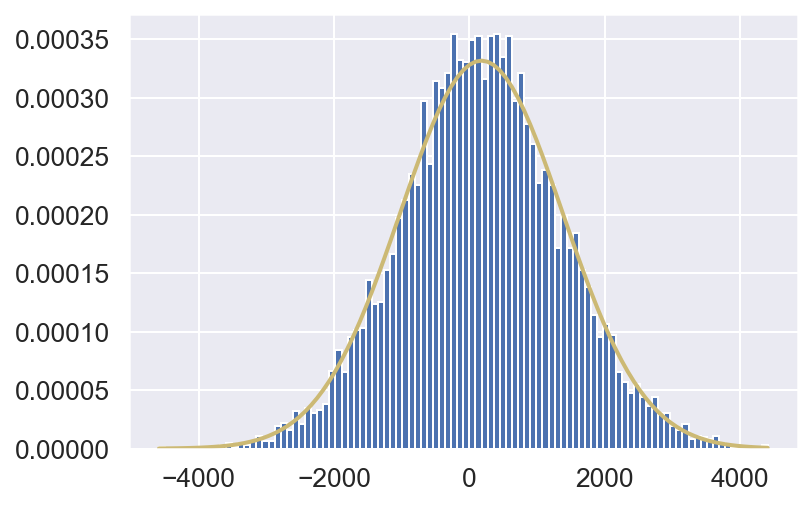

In [447]:
sd2 = math.sqrt(sample2.var())
c = np.random.normal(sample2.mean(), sd2, 7000)
w1, x1, z1 = plt.hist(c, 100, normed=True) #hist

hist2 = norm1(sample2.mean(), sd2, x1)
plot2 = hist2.dist_curve()


In [448]:
from scipy import stats

## Define 2 random distributions
#Sample Size
N=sample1.shape
N=N[0]
#print(N)
sample1.mean()
#Sales_2011.var()

#Gaussian distributed data with mean = 2 and var = 1
a = sample1
#print(a)
#Gaussian distributed data with with mean = 0 and var = 1
b = sample2


## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

#std deviation
s = np.sqrt((var_a + var_b)/2)

## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)


print("t = " + str(t))
print("p = " + str(2*p))
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.


## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

#since our p<5% Our hypothesis is true

t = 37.32352887565854
p = 0.0
t = 37.32352887565853
p = 3.334684350361074e-292


## 1-Way ANOVA

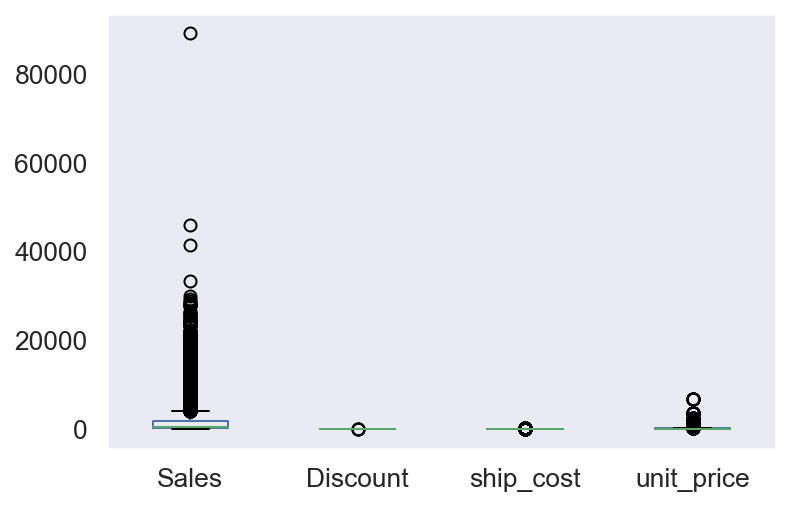

In [449]:
#For 1-Way ANOVA,comapring discount, unit_price, ship_cost over sales to see if they are statistically significant,
#Also there is another scenerio where we can compare sales of 2010,2011,2012 to check their statiscal significance
Sales_Anova=sales
sample1=Sales_Anova['Sales']
sample2=Sales_Anova['Profit']
sample3=Sales_Anova['c_name']
sample4=Sales_Anova['prod_name']
sample5=Sales_Anova['ship_cost']
sample6=Sales_Anova['unit_price']
Sales_Anova
d=Sales_Anova.drop(['order_id','Row ID','prod_name','c_name','order_quantity','ship_date','Year','Month','Day','order_date','order_priorty','prod_cat','prod_sub_cat'],axis=1)

#d=d.transpose()
#d.boxplot(column=['Sales', 'Profit', 'Discount','ship_cost','unit_price'], grid=False)
d.boxplot(column=['Sales', 'Discount','ship_cost','unit_price'], grid=False)

In [450]:
# load packages
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(d['Sales'], d['Discount'], d['ship_cost'], d['unit_price'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(d.reset_index(), id_vars=['index'], value_vars=['Sales', 'Discount','ship_cost','unit_price'])
# replace column names
d_melt.columns = ['index', 'treatments', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

1836.6932328173855 0.0


,sum_sq,df,F,PR(>F)
C(treatments),1.782093e+10,3.0,1836.693233,0.0
Residual,1.015940e+11,31412.0,NaN,NaN


In [451]:
# load packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['treatments'], alpha=0.05)
print(m_comp)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1    group2    meandiff  p-adj    lower      upper    reject
-------------------------------------------------------------------
 Discount      Sales  1771.8797  0.001  1698.1494    1845.61   True
 Discount  ship_cost    12.8175    0.9   -60.9128    86.5479  False
 Discount unit_price    90.2291 0.0091    16.4988   163.9594   True
    Sales  ship_cost -1759.0622  0.001 -1832.7925 -1685.3319   True
    Sales unit_price -1681.6506  0.001 -1755.3809 -1607.9203   True
ship_cost unit_price    77.4116 0.0353     3.6813   151.1419   True
-------------------------------------------------------------------


In [452]:
#Assumption 1: Homogeneity of variances (variances are equal between treatment groups) (Levene or Bartlett Test)
import scipy.stats as stats
w, pvalue = stats.levene(d['Sales'], d['Profit'], d['Discount'], d['ship_cost'])
print(w, pvalue)

1348.2388973162663 0.0


In [453]:
#Assumption 2: Residuals (experimental error) are normally distributed (Shapiro Wilks Test)
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.3345222473144531 0.0


c:\users\hr\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


##2-Way ANOVA

In [454]:
#for 2- Way ANOVA I figured out the following situations
#1. Comparing the Sales of three years i.e. 2010,2011,2012 w.r.t customer
#2. Comparing the Sales of three years w.r.t product
#2. Comparing the Sales of three years w.r.t order_id
#3. Comparing the Sales of three years making profit as our second dimension
#unfornately couldn't organize the date into data frame which didn't allow me to conduct this test, tried for long to arrange the data but didn't help
from numpy import zeros
Year_2011=sales[sales['Year']==2011]
Year_2011=Year_2011.drop(['Row ID','Discount','ship_date','Year','order_quantity','ship_cost','unit_price','order_date','Month','Day','order_priorty','prod_cat','prod_name','prod_sub_cat'],axis=1)
#Year_2011=np.array(Year_2011['Sales'])

Year_2012=sales[sales['Year']==2012]
Year_2012=Year_2012.drop(['Row ID','Discount','ship_date','Year','order_quantity','ship_cost','unit_price','order_date','Month','Day','order_priorty','prod_cat','prod_name','prod_sub_cat'],axis=1)

Year_2010=sales[sales['Year']==2010]
Year_2010=Year_2010.drop(['Row ID','Discount','ship_date','Year','order_quantity','ship_cost','unit_price','Month','Day','order_date','order_priorty','prod_cat','prod_name','prod_sub_cat'],axis=1)
m=np.array([Year_2010['order_id'],Year_2011['order_id'],Year_2012['order_id']])

df = pd.DataFrame([
 { '1_year':[ Year_2010['Sales']], '2_year': [Year_2011['Sales']], '3_year': [Year_2012['Sales']],'o_id': [m]} ])
#df['new'] = df.apply(lambda r: tuple(r), axis=1).apply(np.array)
df

,1_year,2_year,3_year,o_id
0,"[[394.27, 146.69, 228.41, 196.85, 124.56, 59.0...","[[261.54, 4965.759499999999, 93.54, 905.08, 27...","[[10123.02, 244.57, 716.84, 1474.33, 80.61, 44...","[[[515.0, 515.0, 678.0, 807.0, 807.0, 1412.0, ..."


In [455]:
# reshape the d dataframe suitable for statsmodels package 
# you do not need to reshape if your data is already in stacked format. Compare d and d_melt tables for detail 
# understanding 
d_melt = pd.melt(d, id_vars=['o_id'], value_vars=['1_year', '2_year', '3_year'])
# replace column names
d_melt.columns = ['Sales', 'years', 'value']
# generate a boxplot to see the data distribution by genotypes and years. Using boxplot, we can easily detect the 
# differences between different groups
sns.boxplot(x="o_id", y="value", hue="years", data=d_melt, palette="Set3") 

KeyError: "The following 'id_vars' are not present in the DataFrame: ['o_id']"

In [ ]:
# load packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
# C(Genotype):C(years) represent interaction term
model = ols('value ~ C(o_id) + C(years) + C(o_id):C(years)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

In [ ]:
#Question 8: KPI's
sales.boxplot(column='Sales', whis='range', return_type='axes')

In [ ]:
#sales are right skewed because in this distribution the mean is greater than the mode
sales['Sales'].hist()

In [ ]:
sales.boxplot(column='Profit', whis='range', return_type='axes')

In [ ]:
sales['Profit'].hist()

In [ ]:
#Discount is also right skewed
sales.boxplot(column='Discount', whis='range', return_type='axes')

In [ ]:
sales['Discount'].hist()

In [ ]:
sales.boxplot(column='order_quantity', whis='range', return_type='axes')

In [ ]:
#Order quantity id uniformly distributed
sales['order_quantity'].hist()

In [ ]:
sales.boxplot(column='ship_cost', whis='range', return_type='axes')

In [ ]:
#this is positively skewed, due to mean greater than mode
sales['ship_cost'].hist()

Year         2009       2010        2011        2012
Sales  3967057.02  3352883.1  3137155.64  3459637.44


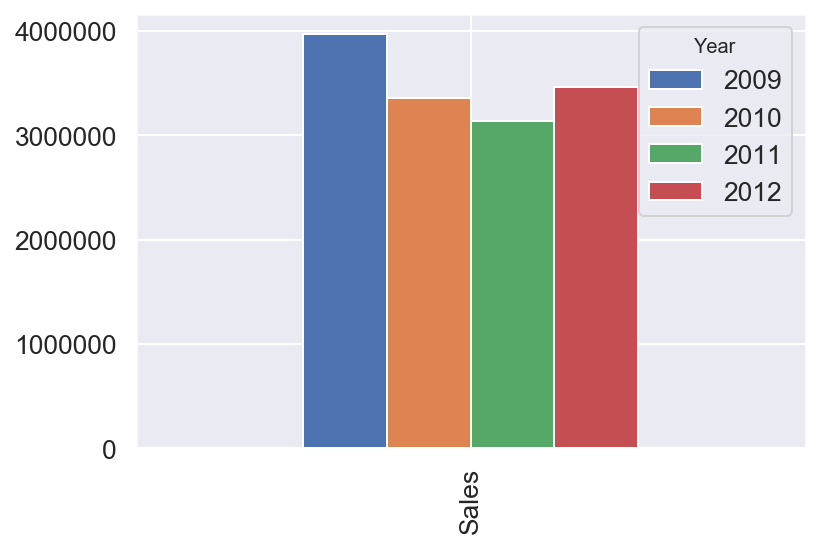

In [456]:
agg_year_sales = Sales_T_Test.pivot_table(columns=['Year'], values='Sales', aggfunc='sum').round(2)
print(agg_year_sales)
agg_year_sales.plot.bar()

Month          1           2           3           4           5         6   \
Sales  1363788.62  1071451.65  1125100.94  1095917.56  1148920.72  913005.1   

Month          7           8           9           10          11          12  
Sales  1097425.66  1049990.29  1266010.49  1334583.79  1032886.05  1417652.34  


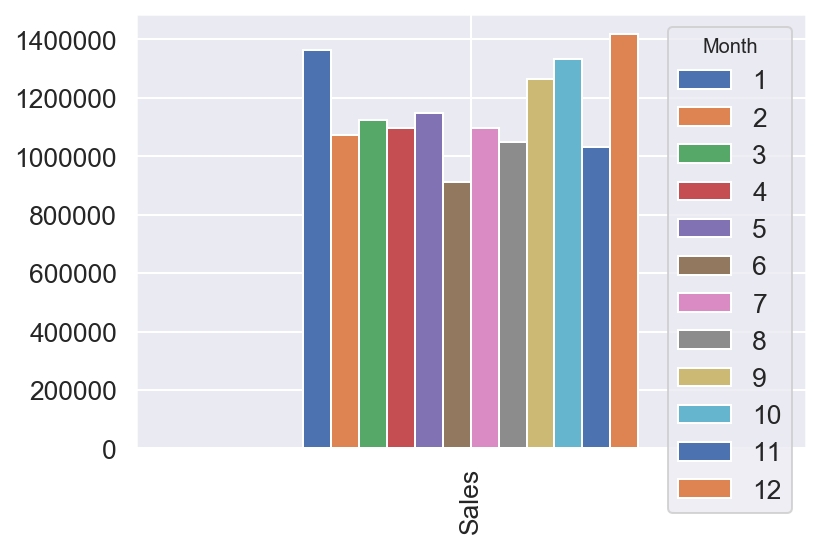

In [457]:
agg_year_sales = Sales_T_Test.pivot_table(columns=['Month'], values='Sales', aggfunc='sum').round(2)
print(agg_year_sales)
agg_year_sales.plot.bar()

Day           1          2         3          4          5          6   \
Sales  418046.55  589254.42  448857.3  480059.05  558975.87  474807.05   

Day           7          8         9          10  ...         22         23  \
Sales  494551.51  313914.85  458125.4  540077.48  ...  493062.39  406652.94   

Day           24         25         26        27         28         29  \
Sales  376524.81  519198.34  385592.93  420000.7  386546.79  453982.54   

Day           30         31  
Sales  361456.27  217157.61  

[1 rows x 31 columns]


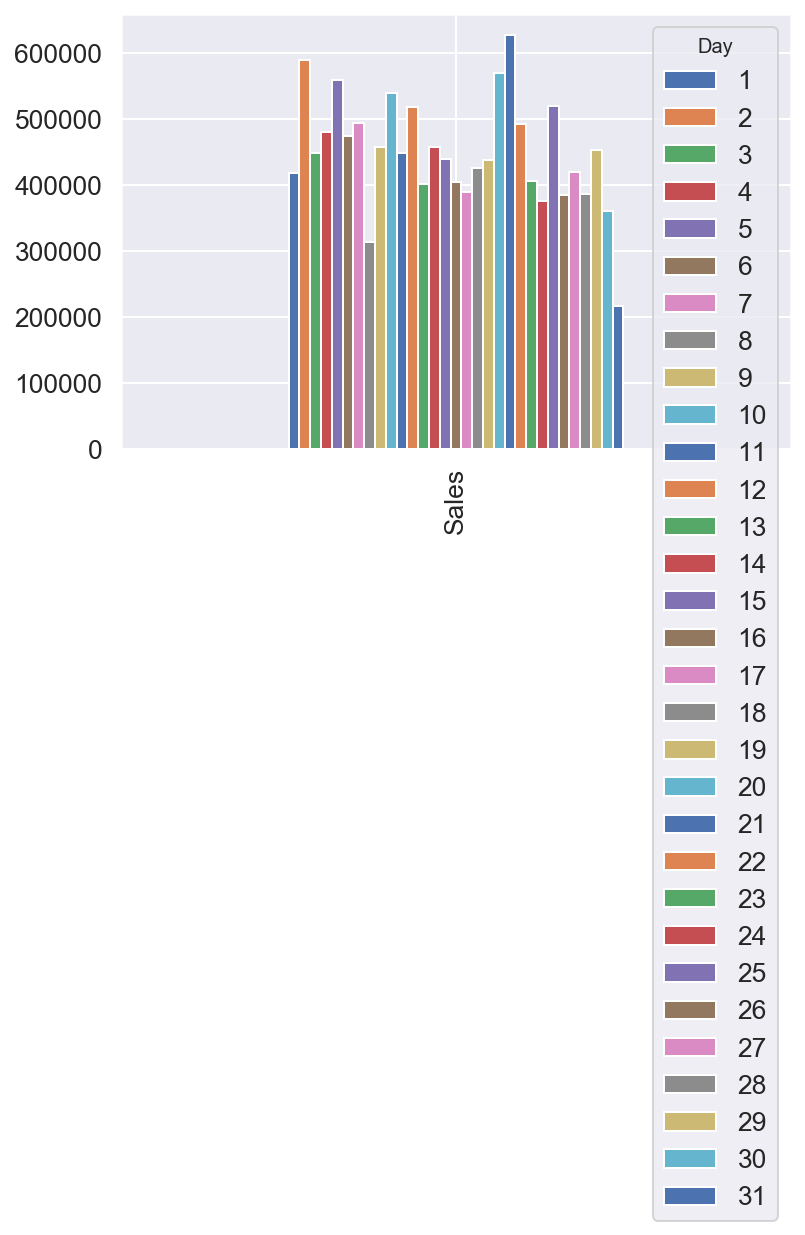

In [458]:
agg_year_sales = Sales_T_Test.pivot_table(columns=['Day'], values='Sales', aggfunc='sum').round(2)
print(agg_year_sales)
agg_year_sales.plot.bar()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


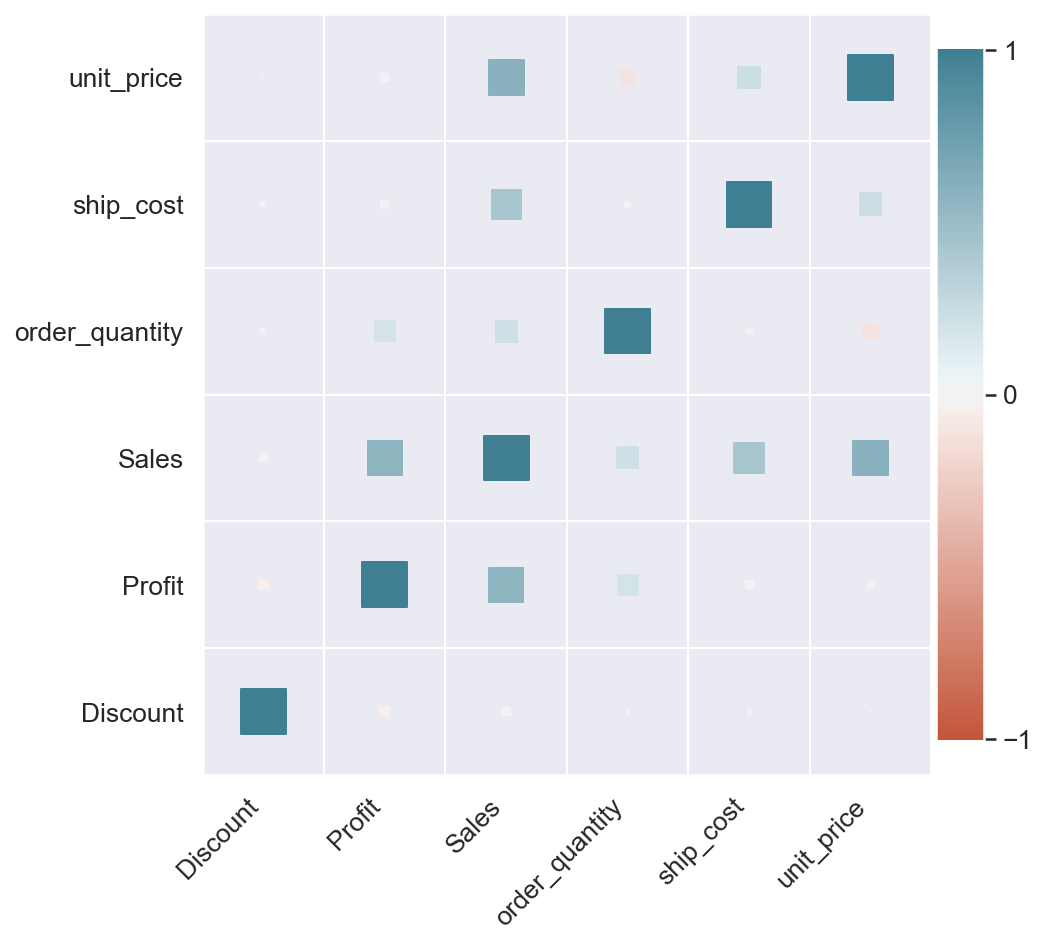

In [459]:
#Question 9
data=sales
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
def heatmap(x, y, size, color):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    
    n_colors = 256 # Use 256 colors for the diverging color palette
    palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
    color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
        ind = int(val_position * (n_colors - 1)) # target index in the color palette
        return palette[ind]
    
    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x15 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the leftmost 14 columns of the grid for the main plot
    
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        c=color.apply(value_to_color), # Vector of square colors, mapped to color palette
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
    ax.grid(False, 'major') # Turn off major gridlines
    ax.grid(True, 'minor') # Turn on minor gridlines
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True) # Set gridlines to appear between integer coordinates
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True) # Do the same for y axis
    
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
       
    # Add color legend on the right side of the plot
    ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

    col_x = [0]*len(palette) # Fixed x coordinate for the bars
    y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

    bar_height = y[1] - y[0]
    ax.barh(
        y=y,
        width=[5]*len(palette), # Make bars 5 units wide
        left=col_x, # Make bars start at 0
        height=bar_height,
        color=palette,
        linewidth=0
    )
    ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
    ax.grid(False) # Hide grid
    ax.set_facecolor('white') # Make background white
    ax.set_xticks([]) # Remove horizontal ticks
    ax.set_yticks(np.linspace(min(y), max(y), 3)) # Show vertical ticks for min, middle and max
    ax.yaxis.tick_right() # Show vertical ticks on the right 
    
columns = ['Sales', 'Profit', 'Discount', 'order_quantity', 'ship_cost', 'unit_price'] 
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs(),
    color=corr['value']
)



In [460]:
#the heatmap result shows that Sales and Profit are mild positively correlated with the color tone, where as the unit price, 
#order quantity and shipping cost also have little effect on sales but overall there is no such strong effect is observed

In [463]:
#Question 10
#what is the average difference between ship and order delivery
#assuming that the orders are being delivered later than the estimated date....


from datetime import datetime


between_ship_order = sales['ship_date']-sales['order_date']
between_ship_order.apply(lambda x: (x.total_seconds())/3600).mean()
#Problem: the 2 different format were not convertble either way so could make any operation like subtraction one was datetime.time and other was datetime.date
#hence no conclusions were possible without seeing the difference.

In [ ]:
newdf = pd.DataFrame(between_ship_order,index = np.arange(len(timediffseries)),columns=['TimeDiff'])

In [ ]:
newdf['TimeDiff'].hist()

In [ ]:
newdf.boxplot(column='TimeDiff', sym='o', return_type='axes')